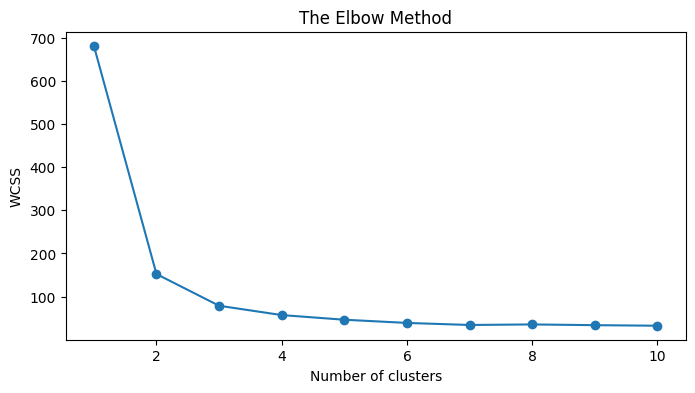

Accuracy without PCA: 0.9136
Time taken without PCA: 57.35 seconds
Accuracy with PCA: 0.9216
Time taken with PCA: 28.22 seconds

Time Improvement (speed-up): 2.03x faster


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_openml
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

iris = load_iris()
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=11)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

mnist = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X, y = mnist

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

start_time = time.time()
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr.fit(X_train_scaled, y_train)
y_pred = logisticRegr.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred)
time_no_pca = time.time() - start_time

print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")
print(f"Time taken without PCA: {time_no_pca:.2f} seconds")

pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

start_time_pca = time.time()
logisticRegr_pca = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr_pca.fit(X_train_pca, y_train)
y_pred_pca = logisticRegr_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
time_pca = time.time() - start_time_pca

print(f"Accuracy with PCA: {accuracy_pca:.4f}")
print(f"Time taken with PCA: {time_pca:.2f} seconds")

print("\nTime Improvement (speed-up):", f"{time_no_pca/time_pca:.2f}x faster")
